In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

### Read in training set of tweets

In [2]:
train = pd.read_csv('final_impossible_text_training_tweets.csv')

In [3]:
train

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound
0,https://twitter.com/Kkh291/status/140275690219...,2021-06-09 22:38:02,@me1stVegan2nd They have 2 make a smaller vers...,1402756902191210497,0,0,0,en,0.079,0.726,0.195,0.6249
1,https://twitter.com/VictoriaH1962/status/14027...,2021-06-09 22:37:37,@brooklin0000 @DavidMazzieAE @catfishyak Impos...,1402756797979582465,2,0,2,en,0.000,1.000,0.000,0.0000
2,https://twitter.com/NliteNinc2/status/14027525...,2021-06-09 22:20:39,@aminorjourney 😬\n\nMake a fake hen out of Imp...,1402752527892766724,1,0,0,en,0.100,0.769,0.131,0.3612
3,https://twitter.com/SonidoMatinal/status/14027...,2021-06-09 22:19:59,"🔔 Impossible Burger, la hamburguesa sin carne ...",1402752359986499584,0,0,0,ca,0.231,0.769,0.000,-0.5574
4,https://twitter.com/PanXchange/status/14027504...,2021-06-09 22:12:31,"In case you missed our recent #blog post, chec...",1402750481257033731,0,1,0,en,0.099,0.901,0.000,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/e4rthmover/status/13057646...,2020-09-15 07:05:27,Loml is officially the impossible burger https...,1305764650080968704,0,0,0,en,0.000,1.000,0.000,0.0000
29996,https://twitter.com/edgesportnfit/status/13057...,2020-09-15 06:36:45,@michaelharriot Biggie Smalls doing remix vers...,1305757428101730304,0,0,0,en,0.000,1.000,0.000,0.0000
29997,https://twitter.com/cennsith/status/1305736363...,2020-09-15 05:13:03,"@t_white_no12 You’re a good dude tom, I promis...",1305736363388604417,1,0,0,en,0.000,0.794,0.206,0.8100
29998,https://twitter.com/fathueyfreeman/status/1305...,2020-09-15 05:12:02,i can get a impossible/turkey/chicken burger a...,1305736107347378176,0,0,0,en,0.000,0.841,0.159,0.2235


In [4]:
train_original=train.copy()

### Read in tweets for test set

In [5]:
test = pd.read_csv('impossible_text_training_tweets.csv', skiprows=range(1, 30001))

In [6]:
test.head()

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang
0,https://twitter.com/sucertamere/status/1305722...,2020-09-15 04:19:23,@Stardogkilledme Thoughts on the impossible bu...,1305722857654226945,0,0,0,en
1,https://twitter.com/chinchlady701/status/13057...,2020-09-15 03:59:43,@jasminelydia17 the thing is one place can hav...,1305717912125218816,0,0,2,en
2,https://twitter.com/coffieluvr/status/13057167...,2020-09-15 03:55:13,@syluwuv RIP WENDYS .. order an impossible bur...,1305716778207719425,0,0,0,en
3,https://twitter.com/BlobCostas/status/13057162...,2020-09-15 03:53:04,@nymillenials What the hell? I ordered an impo...,1305716237318545410,1,0,2,en
4,https://twitter.com/Kirra_Whatever_/status/130...,2020-09-15 03:35:57,the lady at burger king just asked me if i wan...,1305711929219055618,0,0,1,en


In [7]:
test_original=test.copy()

### Save test set of tweets (to be used in part II)

In [8]:
test_original.to_csv('test_tweets.csv', index=False)

### Combine training set and test set

In [9]:
combine = train.append(test,ignore_index=True)

In [10]:
combine

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound
0,https://twitter.com/Kkh291/status/140275690219...,2021-06-09 22:38:02,@me1stVegan2nd They have 2 make a smaller vers...,1402756902191210497,0,0,0,en,0.079,0.726,0.195,0.6249
1,https://twitter.com/VictoriaH1962/status/14027...,2021-06-09 22:37:37,@brooklin0000 @DavidMazzieAE @catfishyak Impos...,1402756797979582465,2,0,2,en,0.000,1.000,0.000,0.0000
2,https://twitter.com/NliteNinc2/status/14027525...,2021-06-09 22:20:39,@aminorjourney 😬\n\nMake a fake hen out of Imp...,1402752527892766724,1,0,0,en,0.100,0.769,0.131,0.3612
3,https://twitter.com/SonidoMatinal/status/14027...,2021-06-09 22:19:59,"🔔 Impossible Burger, la hamburguesa sin carne ...",1402752359986499584,0,0,0,ca,0.231,0.769,0.000,-0.5574
4,https://twitter.com/PanXchange/status/14027504...,2021-06-09 22:12:31,"In case you missed our recent #blog post, chec...",1402750481257033731,0,1,0,en,0.099,0.901,0.000,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...
39994,https://twitter.com/DerQuotenossi/status/14027...,2021-06-09 22:56:14,@maulendemiri ihre Impossible Burger werden au...,1402761483759624192,1,0,1,de,NaN,NaN,NaN,NaN
39995,https://twitter.com/estebanjq3/status/14027590...,2021-06-09 22:46:24,@thehauer Like an impossible burger?,1402759010479181827,1,0,1,en,NaN,NaN,NaN,NaN
39996,https://twitter.com/WilmaDickfit6/status/14027...,2021-06-09 22:45:24,@cerebralsymphoy @AnimalJustice6 @AlanAlan5240...,1402758758716092419,0,0,0,en,NaN,NaN,NaN,NaN
39997,https://twitter.com/xiancommie/status/14027585...,2021-06-09 22:44:24,"@TheAmberPicota Yeah, I was pretty impressed b...",1402758505627455488,1,0,1,en,NaN,NaN,NaN,NaN


### Remove Twitter handles

In [11]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [12]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

### Remove punctuation, numbers, special characters

In [13]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-13-cd036dace8e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


### Remove short words

In [14]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### Tokenize tweets

In [15]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

### Stem tweets

In [17]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [18]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

### Recombine tokens

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [20]:
combine['Tidy_Tweets'] = tokenized_tweet

### Tidy Tweets

In [21]:
combine

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound,Tidy_Tweets
0,https://twitter.com/Kkh291/status/140275690219...,2021-06-09 22:38:02,@me1stVegan2nd They have 2 make a smaller vers...,1402756902191210497,0,0,0,en,0.079,0.726,0.195,0.6249,they have make smaller version imposs burger s...
1,https://twitter.com/VictoriaH1962/status/14027...,2021-06-09 22:37:37,@brooklin0000 @DavidMazzieAE @catfishyak Impos...,1402756797979582465,2,0,2,en,0.000,1.000,0.000,0.0000,imposs burger
2,https://twitter.com/NliteNinc2/status/14027525...,2021-06-09 22:20:39,@aminorjourney 😬\n\nMake a fake hen out of Imp...,1402752527892766724,1,0,0,en,0.100,0.769,0.131,0.3612,make fake imposs burger meat coyot goe chicken...
3,https://twitter.com/SonidoMatinal/status/14027...,2021-06-09 22:19:59,"🔔 Impossible Burger, la hamburguesa sin carne ...",1402752359986499584,0,0,0,ca,0.231,0.769,0.000,-0.5574,imposs burger hamburguesa carn creada laborato...
4,https://twitter.com/PanXchange/status/14027504...,2021-06-09 22:12:31,"In case you missed our recent #blog post, chec...",1402750481257033731,0,1,0,en,0.099,0.901,0.000,-0.2960,case miss recent #blog post check #hemp probab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,https://twitter.com/DerQuotenossi/status/14027...,2021-06-09 22:56:14,@maulendemiri ihre Impossible Burger werden au...,1402761483759624192,1,0,1,de,NaN,NaN,NaN,NaN,ihr imposs burger werden selben grill rinderbu...
39995,https://twitter.com/estebanjq3/status/14027590...,2021-06-09 22:46:24,@thehauer Like an impossible burger?,1402759010479181827,1,0,1,en,NaN,NaN,NaN,NaN,like imposs burger
39996,https://twitter.com/WilmaDickfit6/status/14027...,2021-06-09 22:45:24,@cerebralsymphoy @AnimalJustice6 @AlanAlan5240...,1402758758716092419,0,0,0,en,NaN,NaN,NaN,NaN,should backsid honey look like imposs burger p...
39997,https://twitter.com/xiancommie/status/14027585...,2021-06-09 22:44:24,"@TheAmberPicota Yeah, I was pretty impressed b...",1402758505627455488,1,0,1,en,NaN,NaN,NaN,NaN,yeah pretti impress their imposs burger


In [22]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [32]:
stopwords = ['imposs burger', 'imposs', 'burger', 'beyond', 'beyond burger', 'http', 'thi', 'carn', 'that', 'hamburguesa', 'impossibleburg', 'tri', 'they']

### Create word cloud of tweets with positive compound sentiment

In [33]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']>0])

In [34]:
wc_positive = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_positive)

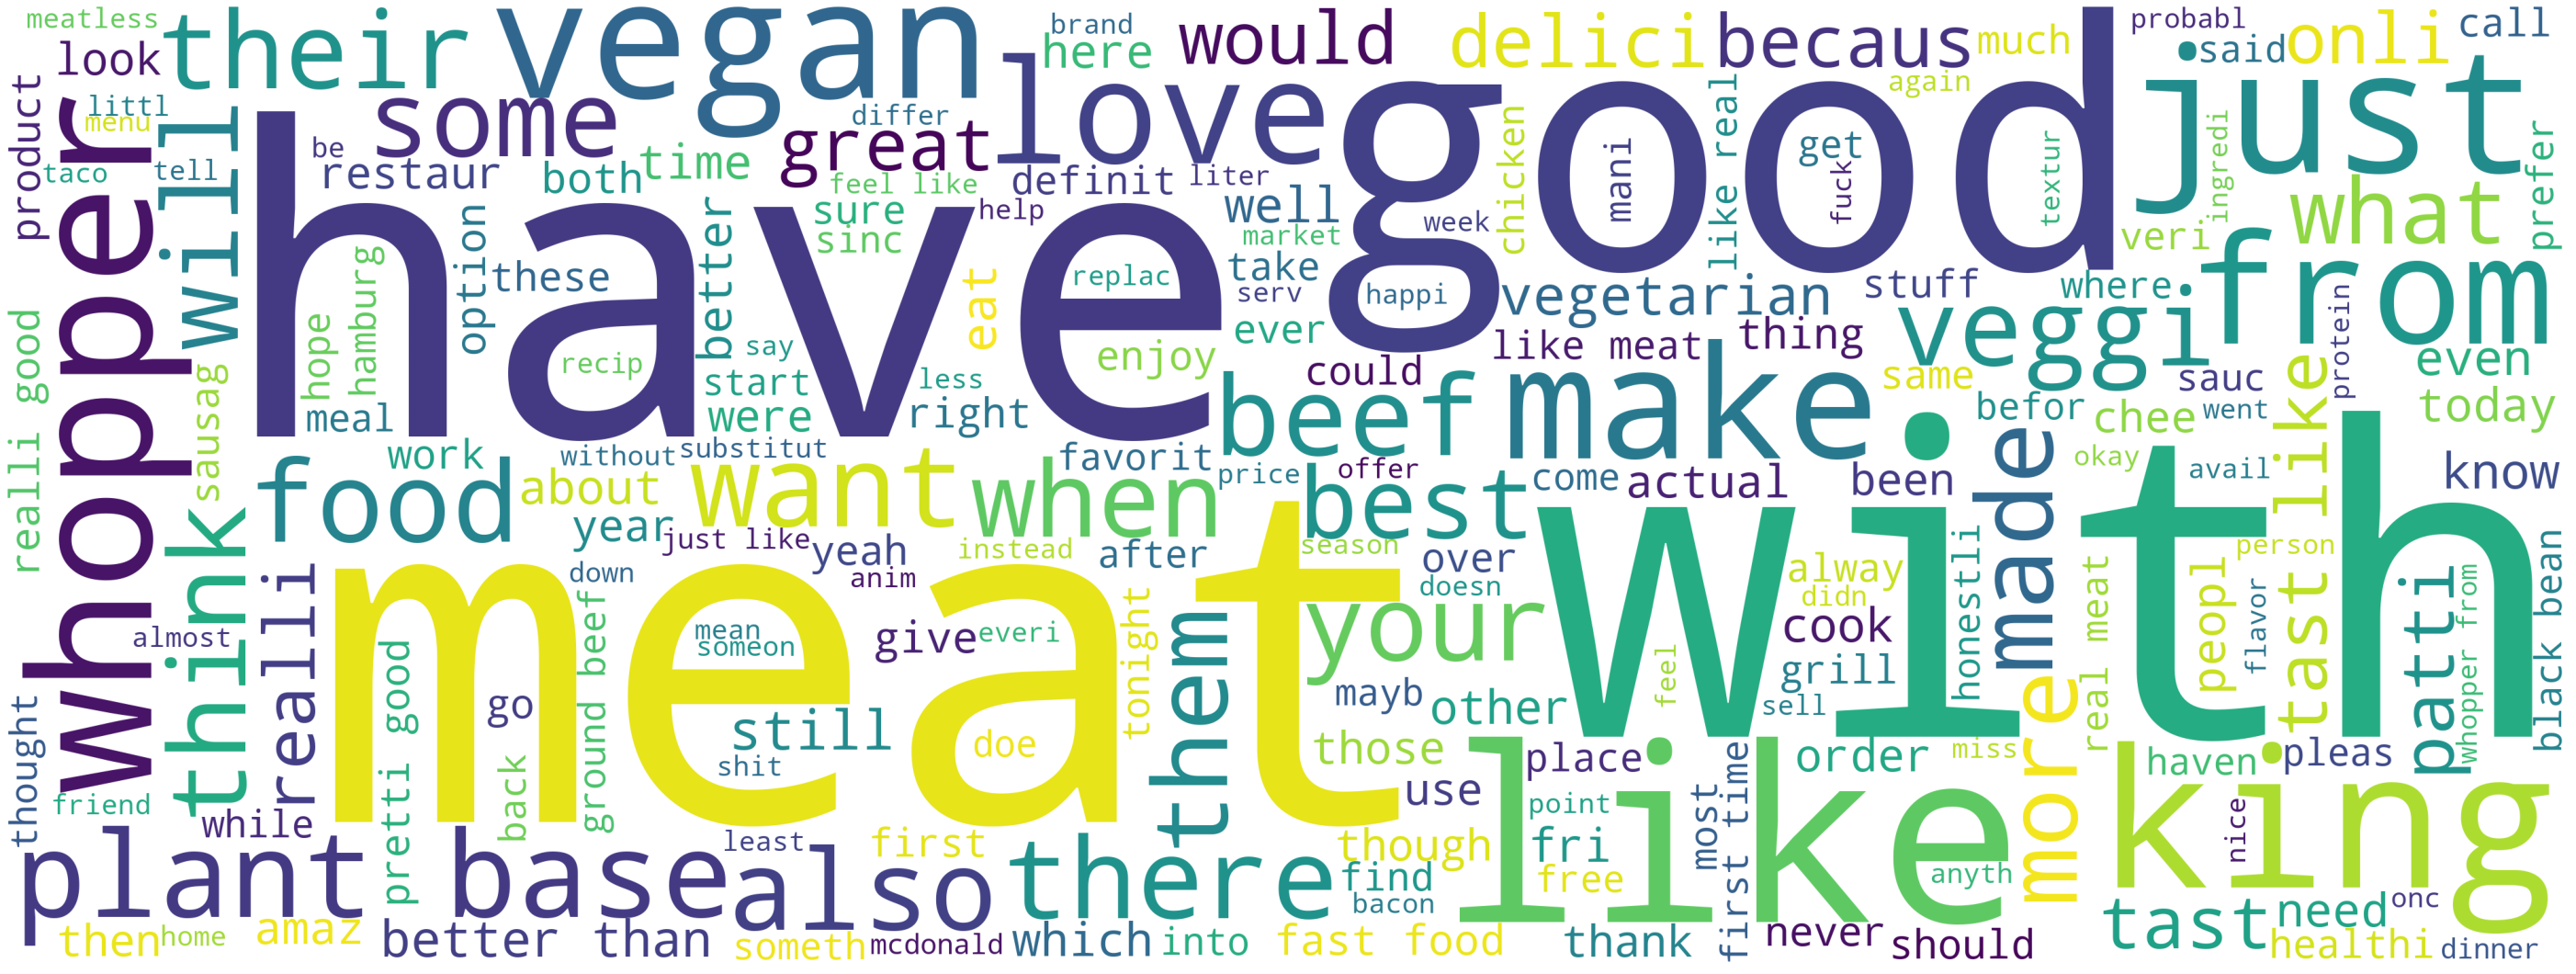

In [35]:
plt.figure(figsize=(50,50))
plt.imshow(wc_positive)
plt.axis('off')
plt.show()

In [36]:
wc_positive.to_file('impossible_wc_positive.png')

### Create word cloud of tweets with negative compound sentiment

In [37]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']<0])

In [38]:
wc_negative = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_negative)

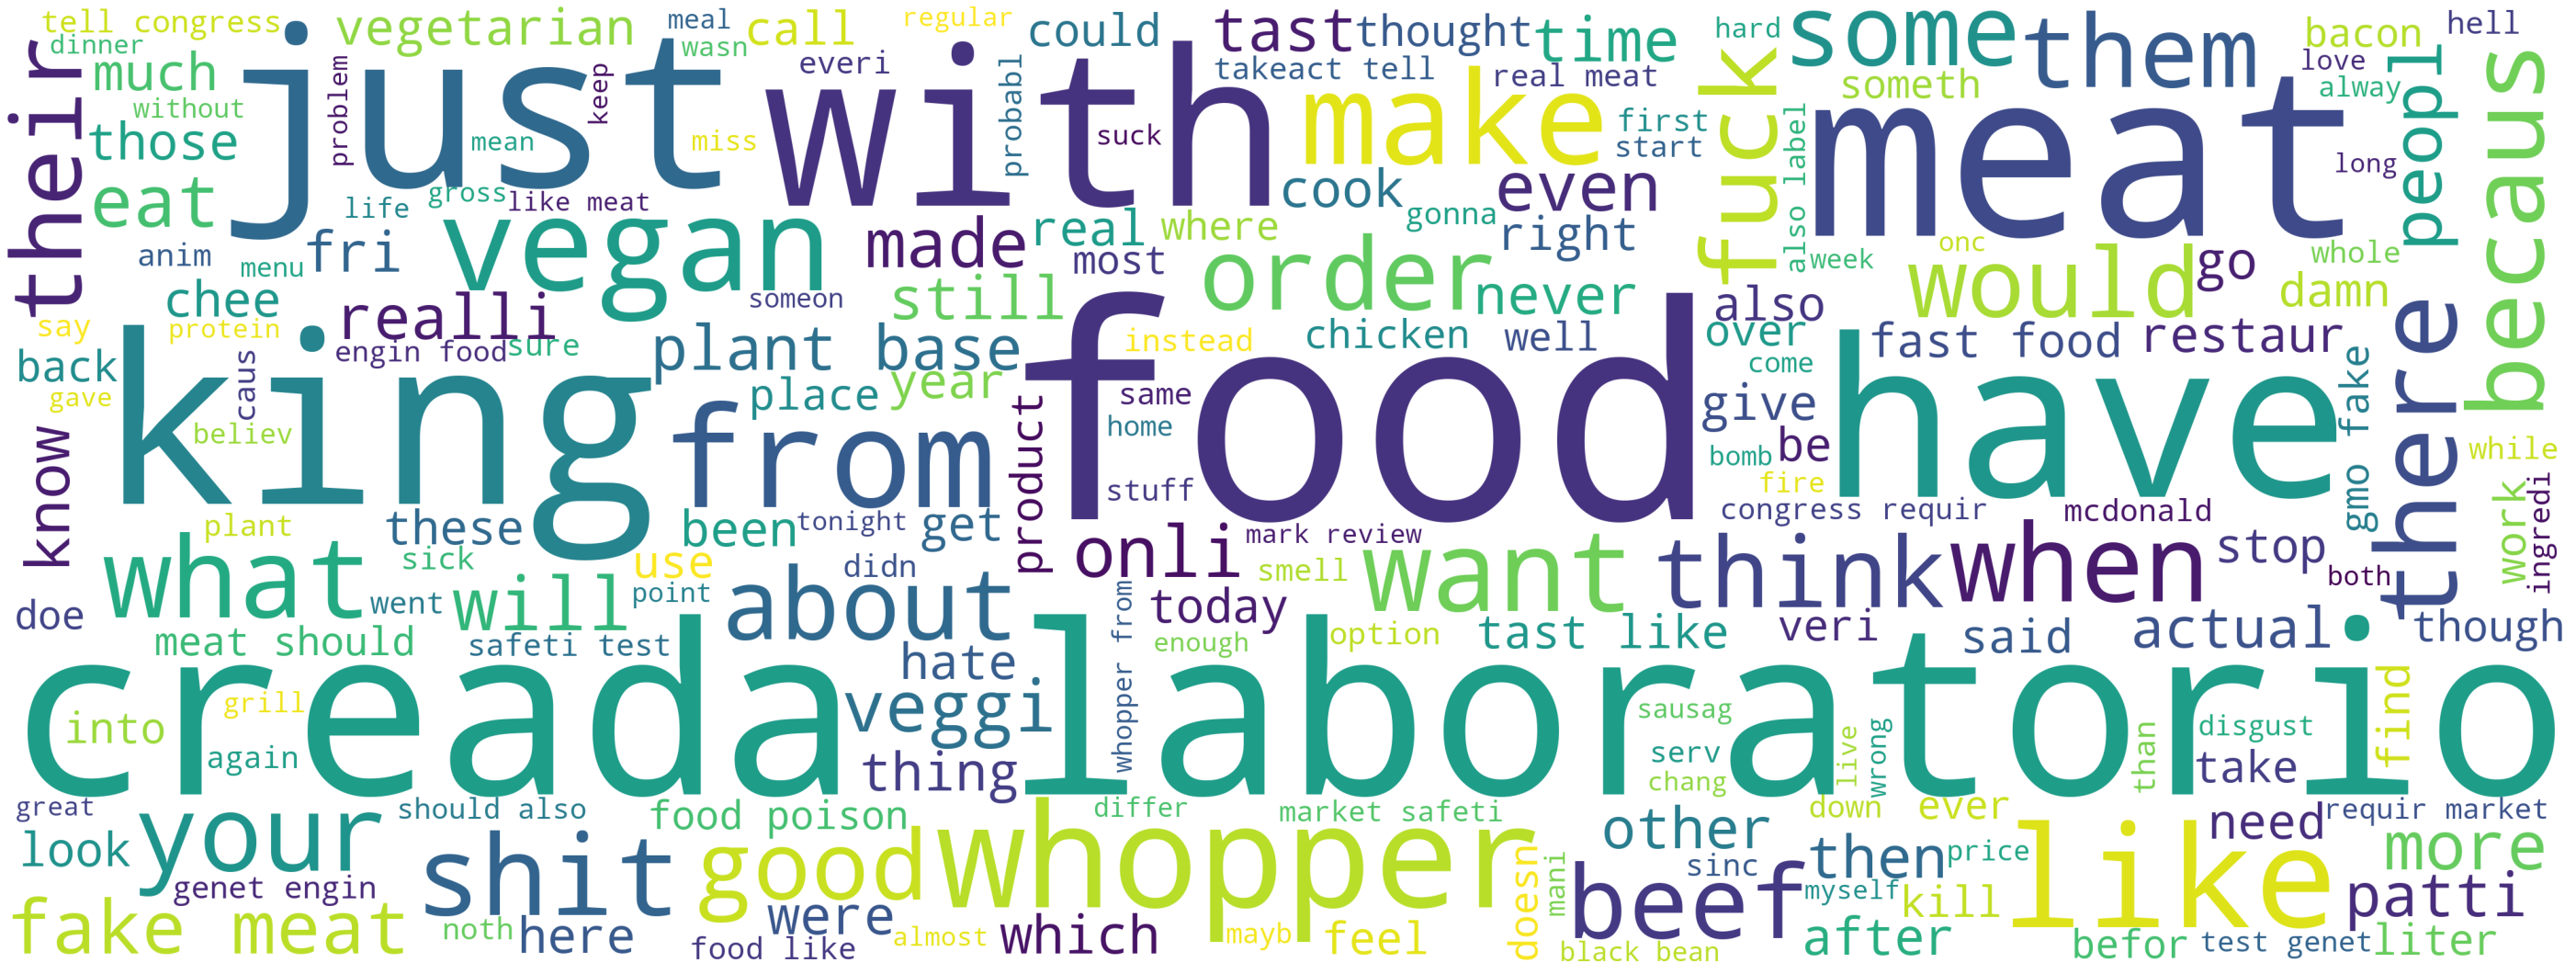

In [39]:
plt.figure(figsize=(50,50))
plt.imshow(wc_negative)
plt.axis('off')
plt.show()

In [40]:
wc_negative.to_file('impossible_wc_negative.png')

In [41]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

### Extract hashtags from tweets with positive compound sentiment

In [42]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']>0])

In [43]:
ht_positive

[[],
 [],
 [],
 ['imposs', 'burger', 'myownrecip'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['shitamdavadeat'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['quantumburg', 'crueltyfre'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['helpmehelpy'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['burgerk'],
 [],
 [],
 [],
 [],
 ['impossibleburg',
  'eatdantanna',
  'burger',
  'veganburg',
  'atlvegan',
  'atlantavegan',
  'atlvegan',
  'impossiblefood'],
 [],
 ['plantbas', 'vegan'],
 [],
 [],
 ['whopper'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [44]:
ht_positive_unnest = sum(ht_positive,[])

In [45]:
ht_positive_unnest

['imposs',
 'burger',
 'myownrecip',
 'shitamdavadeat',
 'quantumburg',
 'crueltyfre',
 'helpmehelpy',
 'burgerk',
 'impossibleburg',
 'eatdantanna',
 'burger',
 'veganburg',
 'atlvegan',
 'atlantavegan',
 'atlvegan',
 'impossiblefood',
 'plantbas',
 'vegan',
 'whopper',
 'whopper',
 'fastfood',
 'vegan',
 'meatless',
 'impossibleburg',
 'pride',
 'prideal',
 'plantbas',
 'plantbasedfood',
 'sayftychat',
 'impossibleburg',
 'icecreamsandwhich',
 'melt',
 'comedi',
 'sundaysunda',
 'indoorveganbbq',
 'imposs',
 'vegan',
 'tombergin',
 'eatbeef',
 'burger',
 'vegetarian',
 'food',
 'redrobin',
 'govegan',
 'hors',
 'nationalveggieburgerday',
 'yyc',
 'nationalveggieburgerday',
 'vegetarian',
 'vegan',
 'veggieburg',
 'veganburg',
 'veganchees',
 'pescatarian',
 'beanburg',
 'plantbas',
 'veganfriendli',
 'veganrestaur',
 'beyond',
 'impossibleburg',
 'wahlburg',
 'pittsburgh',
 'impossibleburg',
 'nationalveggieburgerday',
 'nationalveggieburgereday',
 'veggielov',
 'nationalvrggieburger

### Extract hashtags from tweets with negative compound sentiment

In [48]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']<0])

In [49]:
ht_negative

[[],
 ['blog', 'hemp', 'impossibleburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['burgerk', 'impossibleburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['burger', 'food'],
 [],
 [],
 [],
 [],
 ['impossibleburg',
  'artoftheburg',
  'themetropolitianmuseum',
  'themetro',
  'dupontcircl',
  'willheeverreturn'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['doghau'],
 [],
 [],
 [],
 ['burgerk'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['mcdonald', 'maggi', 'noodl', 'burger'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [50]:
ht_negative_unnest = sum(ht_negative,[])

In [51]:
ht_negative_unnest

['blog',
 'hemp',
 'impossibleburg',
 'burgerk',
 'impossibleburg',
 'impossibleburg',
 'burger',
 'food',
 'impossibleburg',
 'artoftheburg',
 'themetropolitianmuseum',
 'themetro',
 'dupontcircl',
 'willheeverreturn',
 'doghau',
 'burgerk',
 'mcdonald',
 'maggi',
 'noodl',
 'burger',
 'saveprodigalson',
 'overdressedexpert',
 'impossibleburg',
 'grill',
 'fakenew',
 'summertim',
 'newfestprid',
 'notalonetalk',
 'foodielif',
 'miamirestaur',
 'healthyfoodmotiv',
 'healthylif',
 'meetpeopleinmiami',
 'aromasmiami',
 'aromamia',
 'beyondmeat',
 'impossibleburg',
 'billgat',
 'eatbeef',
 'demandusabeef',
 'memorialday',
 'veganfilmclub',
 'nationalburgerday',
 'involuntarilyvegan',
 'impossibleburg',
 'food',
 'diet',
 'letsgeteth',
 'impossibleburg',
 'eatplantbasedfood',
 'plantbas',
 'washu',
 'imposs',
 'live',
 'memorialday',
 'free',
 'live',
 'memorialday',
 'free',
 'live',
 'memorialday',
 'free',
 'frankenfood',
 'saynotogmo',
 'burgerk',
 'mcdonald',
 'lunaci',
 'bullshit',
 

### Frequency of hashtags from tweets with positive compound sentiment

In [52]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [53]:
word_freq_positive

FreqDist({'impossibleburg': 469, 'vegan': 138, 'plantbas': 93, 'burger': 73, 'imposs': 52, 'vegetarian': 50, 'podcast': 48, 'marri': 48, 'chat': 48, 'life': 48, ...})

In [54]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [65]:
sorted_df_positive = df_positive.sort_values(by='Count', ascending=False)

In [66]:
sorted_df_positive

,Hashtags,Count
8,impossibleburg,469
15,vegan,138
14,plantbas,93
1,burger,73
0,imposs,52
...,...,...
583,makingmemori,1
582,bt,1
581,mothersday,1
580,veganfoodi,1


### Create bar plot of top 20 hashtags from tweets with positive compound sentiment

In [67]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

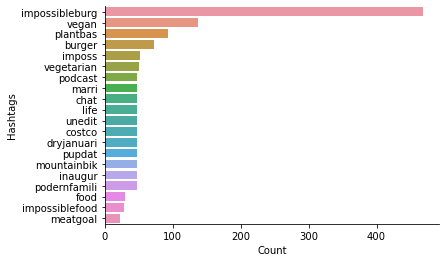

In [68]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

### Frequency of hashtags from tweets with negative compound sentiment

In [69]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [70]:
word_freq_negative

FreqDist({'gmo': 108, 'impossibleburg': 93, 'vegan': 40, 'plantbas': 23, 'wewereher': 19, 'takeact': 17, 'burger': 14, 'vegetarian': 14, 'burgerk': 11, 'imposs': 10, ...})

In [71]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [72]:
sorted_df_negative = df_negative.sort_values(by='Count', ascending=False)

In [74]:
sorted_df_negative

,Hashtags,Count
84,gmo,108
2,impossibleburg,93
49,vegan,40
40,plantbas,23
399,wewereher,19
...,...,...
181,radio,1
180,dotheimpossibledav,1
179,burnvegan,1
178,supercarnivor,1


### Create bar plot of top 20 hashtags from tweets with negative compound sentiment

In [75]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

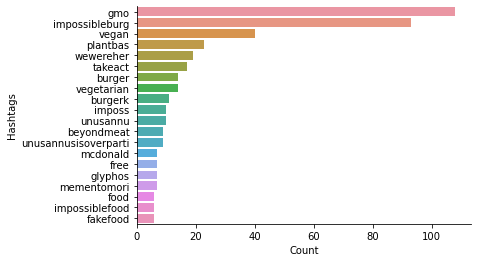

In [76]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()